<h3>Dataset can be found here: <a href="https://www.kaggle.com/datasets/nikhilgurav21/nail-disease-detection-dataset/data">Nail Disease Detection Dataset On Kaggle</a></h3>

## Overview and Objective

The Nail Disease Detection Dataset consists of a collection of images used for training machine learning models to detect various nail diseases. It includes diverse samples that facilitate the development of robust image classification algorithms.

<br>

The goal of this analysis is to build a deep learning model that can accurately classify images of nails into different categories of diseases. By leveraging transfer learning with a pre-trained model, we aim to achieve high accuracy and reliability in predictions.

<br>

This dataset provides a comprehensive collection of images aimed at supporting the development of machine learning models for detecting nail diseases, including Acral Lentiginous Melanoma, Healthy Nail, Onychogryphosis, Blue Finger, Clubbing, and Pitting diseases.

<br>

Contains subfolders for each category:
- acral_lentiginous_melanoma
- healthy_nail
- onychogryphosis
- blue_finger
- clubbing
- pitting

## Data Preparation

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/nikhilgurav21/nail-disease-detection-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: afreenhossain
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nikhilgurav21/nail-disease-detection-dataset


100%|██████████| 63.8M/63.8M [00:01<00:00, 63.5MB/s]


After downloading, the dataset is organized into a specific directory structure. The `data_dir` variable points to the main directory, containing subdirectories for training (`train`) and validation (`validation`).

In [4]:
data_dir = "/content/nail-disease-detection-dataset/data"

train_dir = data_dir + "/train"
test_dir = data_dir + "/validation"

In [5]:
train_dir, test_dir

('/content/nail-disease-detection-dataset/data/train',
 '/content/nail-disease-detection-dataset/data/validation')

In [7]:
import os

In [8]:
os.listdir(train_dir)

['Healthy_Nail',
 'clubbing',
 'Onychogryphosis',
 'Acral_Lentiginous_Melanoma',
 'blue_finger',
 'pitting']

In [9]:
os.listdir(test_dir)

['Healthy_Nail',
 'clubbing',
 'Onychogryphosis',
 'Acral_Lentiginous_Melanoma',
 'blue_finger',
 'pitting']

In [10]:
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}\n")

There are 2 directories and 0 files in /content/nail-disease-detection-dataset/data

There are 6 directories and 0 files in /content/nail-disease-detection-dataset/data/validation

There are 0 directories and 20 files in /content/nail-disease-detection-dataset/data/validation/Healthy_Nail

There are 0 directories and 16 files in /content/nail-disease-detection-dataset/data/validation/clubbing

There are 0 directories and 12 files in /content/nail-disease-detection-dataset/data/validation/Onychogryphosis

There are 0 directories and 18 files in /content/nail-disease-detection-dataset/data/validation/Acral_Lentiginous_Melanoma

There are 0 directories and 9 files in /content/nail-disease-detection-dataset/data/validation/blue_finger

There are 0 directories and 16 files in /content/nail-disease-detection-dataset/data/validation/pitting

There are 6 directories and 0 files in /content/nail-disease-detection-dataset/data/train

There are 0 directories and 323 files in /content/nail-disease

In [11]:
from torchvision.datasets import ImageFolder

In [12]:
dataset = ImageFolder(data_dir)
dataset

Dataset ImageFolder
    Number of datapoints: 3835
    Root location: /content/nail-disease-detection-dataset/data

In [13]:
train_folder = ImageFolder(train_dir)
test_folder = ImageFolder(test_dir)

print(train_folder, "\n\n", test_folder)

Dataset ImageFolder
    Number of datapoints: 3744
    Root location: /content/nail-disease-detection-dataset/data/train 

 Dataset ImageFolder
    Number of datapoints: 91
    Root location: /content/nail-disease-detection-dataset/data/validation


In [14]:
classes = train_folder.classes
classes

['Acral_Lentiginous_Melanoma',
 'Healthy_Nail',
 'Onychogryphosis',
 'blue_finger',
 'clubbing',
 'pitting']

In [19]:
train_folder[735]

(<PIL.Image.Image image mode=RGB size=416x416>, 1)

In [62]:
import torch

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Visualize images

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

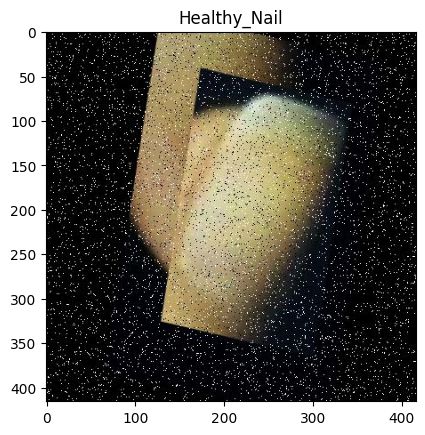

In [25]:
img, label = train_folder[735]

plt.imshow(img)
plt.title(classes[label])
plt.show()

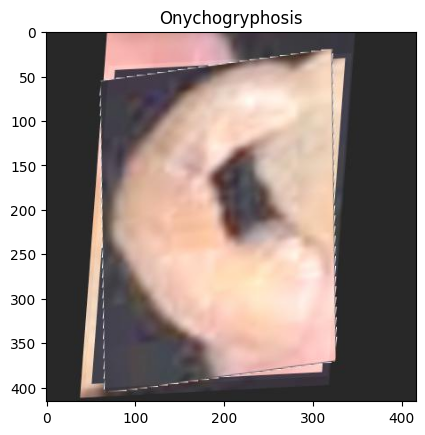

In [45]:
img, label = train_folder[1503]

plt.imshow(img)
plt.title(classes[label])
plt.show()

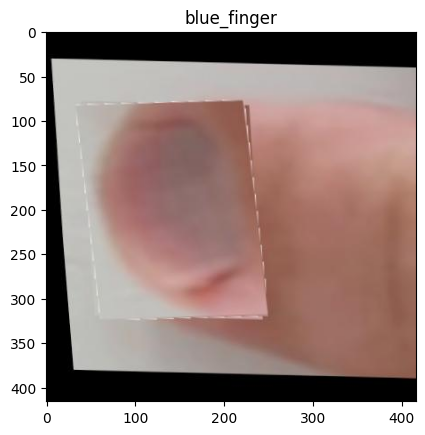

In [68]:
img, label = train_folder[1809]

plt.imshow(img)
plt.title(classes[label])
plt.show()

## Data Transformation and Augmentation

Data transformation is crucial for preparing images for model training. Transformations enhance the dataset's diversity and help the model generalize better by preventing overfitting.

We perform various transformations on the training dataset, including:

- **Resizing**: Standardizes the input size to 250x250 pixels.
- **Random Flipping**: Applies random horizontal and vertical flips to create variations.
- **Normalization**: Scales pixel values to a range that facilitates faster convergence during training.

In [48]:
import torchvision.transforms as transform

In [52]:
train_set = ImageFolder(train_dir, transform.Compose([
    transform.Resize((250, 250)),
    transform.RandomHorizontalFlip(p=0.5),
    transform.RandomVerticalFlip(p=0.5),
    transform.ToTensor(),
    transform.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))


test_set = ImageFolder(test_dir, transform.Compose([
    transform.Resize((250, 250)),
    transform.ToTensor(),
    transform.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))

In [53]:
train_set

Dataset ImageFolder
    Number of datapoints: 3744
    Root location: /content/nail-disease-detection-dataset/data/train
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [54]:
test_set

Dataset ImageFolder
    Number of datapoints: 91
    Root location: /content/nail-disease-detection-dataset/data/validation
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [56]:
test_set.classes

['Acral_Lentiginous_Melanoma',
 'Healthy_Nail',
 'Onychogryphosis',
 'blue_finger',
 'clubbing',
 'pitting']

## Visualize transformed images

To illustrate the effect of these transformations, we can visualize a few transformed images from the training set. This gives insights into how the model will see the data during training.

In [60]:
img, label = test_set[90]

In [64]:
img, label

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

Text(0.5, 1.0, 'pitting')

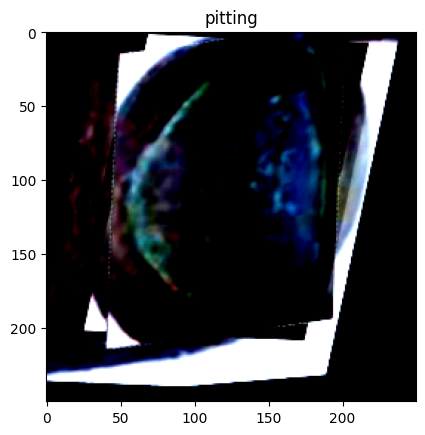

In [66]:
plt.imshow(img.permute(1, 2, 0))
plt.title(classes[label])

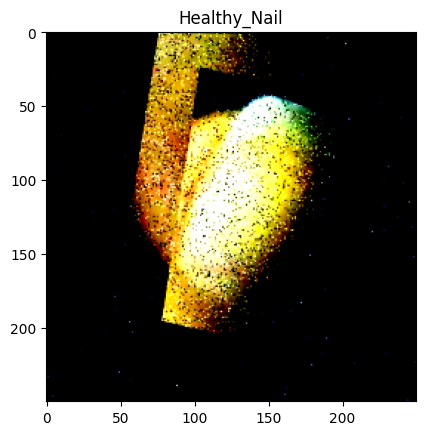

In [69]:
img, label = train_set[735]

plt.imshow(img.permute(1, 2, 0))
plt.title(classes[label])
plt.show()

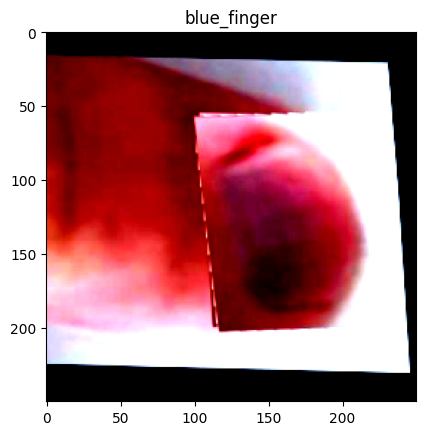

In [71]:
img, label = train_set[1809]

plt.imshow(img.permute(1, 2, 0))
plt.title(classes[label])
plt.show()

## Create Dataloaders

Dataloaders are essential for loading data efficiently in batches during model training. They help manage memory and speed up the training process by providing data in a structured format.

The training set is further split into training and validation datasets, with a typical split ratio (e.g., 75% for training and 25% for validation). This allows us to evaluate the model's performance during training.

In [73]:
len(train_set)

3744

In [74]:
val_pct = 0.25
val_size = int(val_pct * len(train_set))
train_size = int(len(train_set) - val_size)

val_size, train_size

(936, 2808)

In [76]:
from torch.utils.data import random_split

In [77]:
train_ds, val_ds = random_split(train_set, [train_size, val_size])

len(train_ds), len(val_ds)

(2808, 936)

In [78]:
from torch.utils.data import DataLoader

In [79]:
train_dl = DataLoader(train_ds, shuffle=True, batch_size=16, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

In [80]:
train_dl, val_dl

(<torch.utils.data.dataloader.DataLoader at 0x7aa752333fd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7aa752333a00>)

## Visalize a batch of data

After creating batches of data using DataLoader, let's visualize a batch.

In [82]:
for images, labels in train_dl:
  print(images, labels)
  break

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.0665, -2.0494, -2.0494],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1008, -2.1008],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1008],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0007, -2.0182, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -1.9657, -1.9832, -1.9657],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.7696, -1.7696, -1.7347],
          [-1.8044, -1.8044, -

In [81]:
from torchvision.utils import make_grid
import torchvision

In [83]:
def visualize_batch(images, labels):
  grid_img = torchvision.utils.make_grid(images, nrow=8, padding=2)

  np_img = grid_img.numpy().transpose((1, 2, 0))

  plt.figure(figsize=(15, 15))
  plt.imshow(np_img)
  plt.title("Batch of images with labels")
  plt.axis("off")
  plt.show()

  for i in range(len(images)):
    img = images[i]
    label = labels[i].item()

    img = img.permute(1, 2, 0).numpy()

    plt.figure()
    plt.imshow(img)
    plt.title(f"Label: {label}, which is {classes[label]}")
    plt.axis("off")
    plt.show()

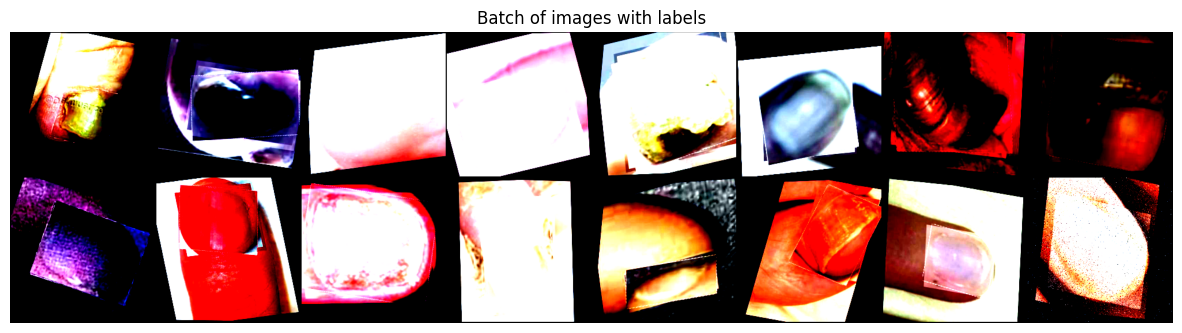

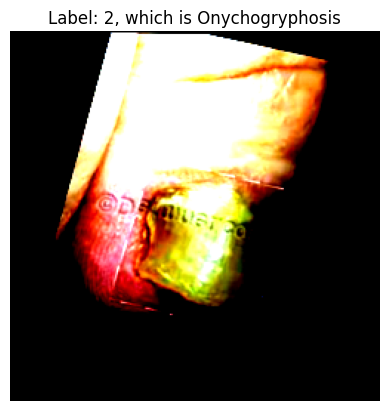

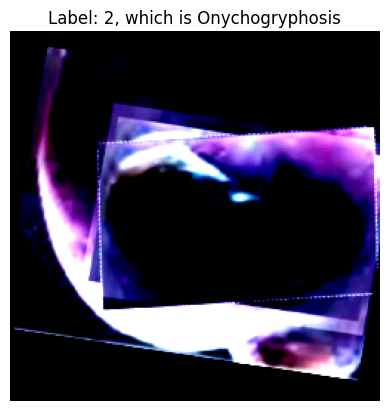

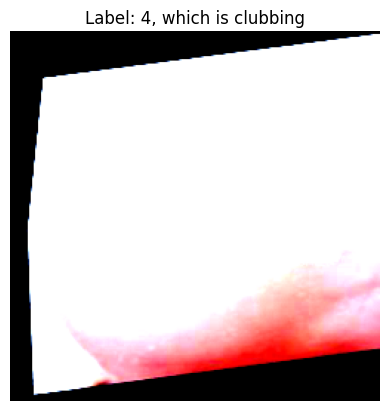

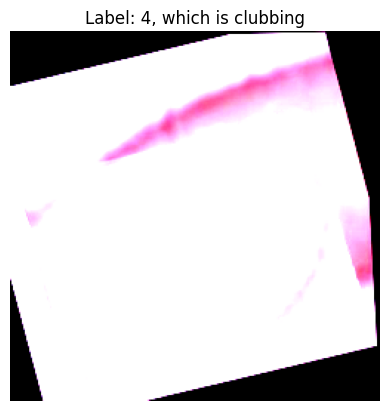

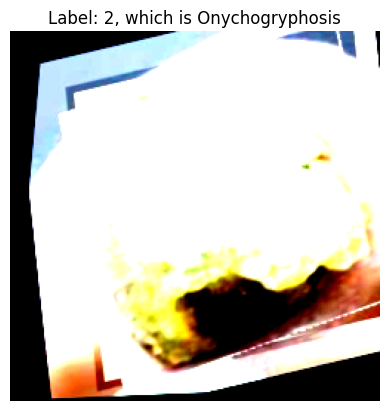

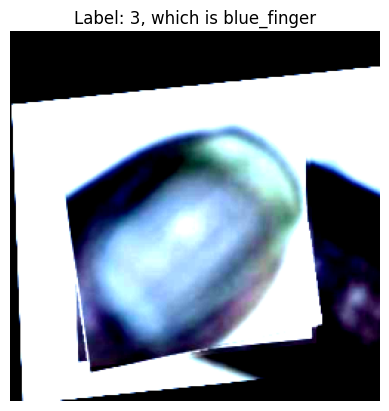

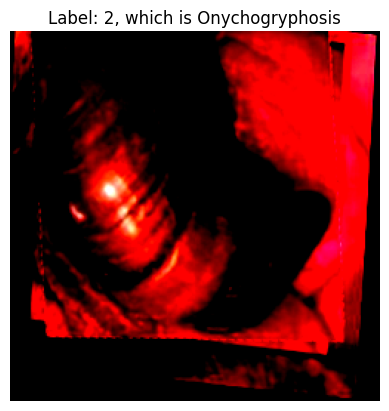

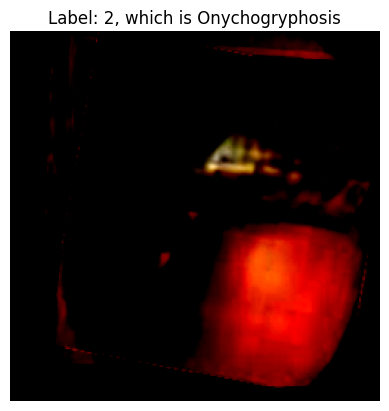

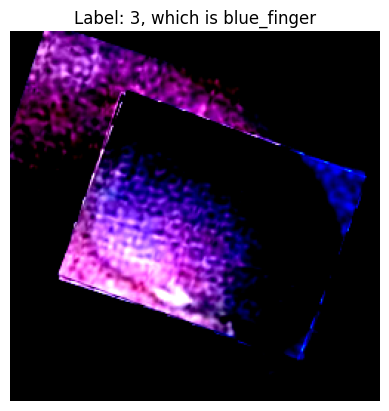

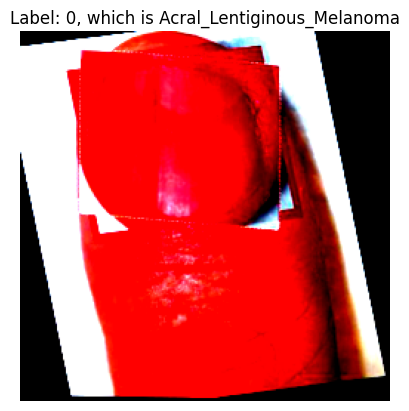

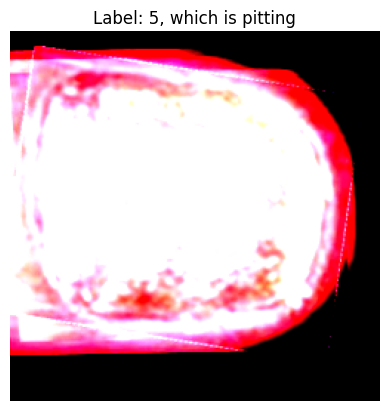

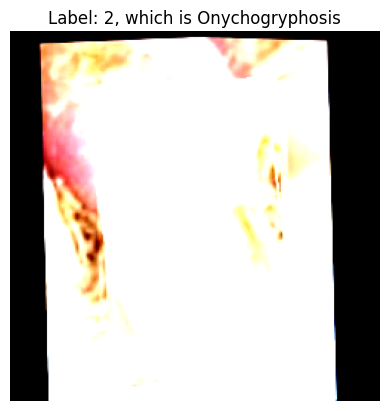

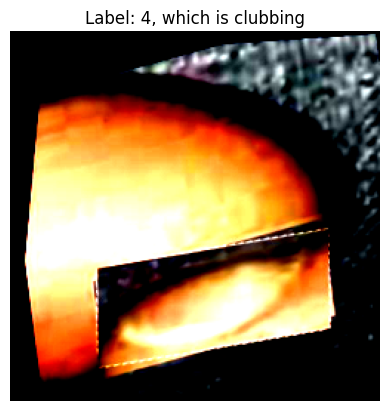

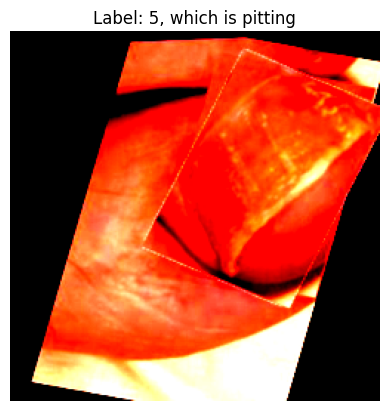

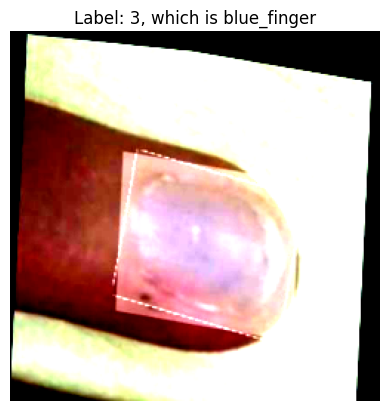

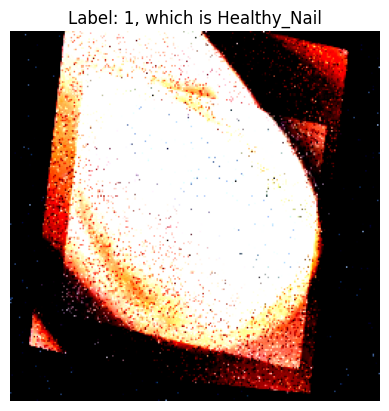

In [84]:
for batch in train_dl:
  images, labels = batch
  visualize_batch(images, labels)
  break

In [85]:
for batch in val_dl:
  images, labels = batch
  visualize_batch(images, labels)
  break

Output hidden; open in https://colab.research.google.com to view.

## Load Pre-trained Model (Transfer Learning)

For the nail disease classification task, I'm using the `ResNet-18 model`.

`ResNet-18` employs residual connections, allowing gradients to flow through the network without vanishing. It has been pre-trained on the `ImageNet` dataset, providing a rich set of features that can be fine-tuned for our specific classification task. This transfer learning approach speeds up the training process and often yields better performance.

In [87]:
from torchvision import models
from torch import nn

To tailor `ResNet-18` for our task, we replace the final classification layer. The new layer corresponds to the number of classes in our nail disease dataset.

In [89]:
model = models.resnet18(pretrained=True)

num_classes = len(classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

In [90]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Loss function and Optimizer

We use `CrossEntropyLoss` as our `loss` function, which is suitable for multi-class classification tasks. The `Adam` `optimizer` is selected for its adaptive `learning rate`, which often leads to faster convergence.

In [92]:
from torch import optim

In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [94]:
criterion

CrossEntropyLoss()

In [95]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

## Training and Validation Loop

In [96]:
def train_model(model, train_dl, val_dl, criterion, optimizer, num_epochs, device):
  train_losses = []
  val_losses = []
  train_accuracies = []
  val_accuracies = []

  # TRAINING LOOP
  for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_dl:
      images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

      _, predicted = torch.max(outputs, 1)

      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_dl)
    train_accuracy = (100 * correct) / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # =============================================================================


    # VALIDATION LOOP
    model.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
      for images, labels in val_dl:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)

        loss = criterion(outputs, labels)
        val_loss += loss.item()

        # calc. accuracy
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

      val_loss /= len(val_dl)
      val_accuracy = (100 * correct) / total
      val_losses.append(val_loss)
      val_accuracies.append(val_accuracy)

      print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

  return train_losses, val_losses, train_accuracies, val_accuracies

In [97]:
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model=model,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=10,
    device=device
)

Epoch [1/10], Train Loss: 1.2223, Train Accuracy: 52.78%, Val Loss: 1.1639, Val Accuracy: 54.38%
Epoch [2/10], Train Loss: 0.8690, Train Accuracy: 67.95%, Val Loss: 1.8224, Val Accuracy: 51.71%
Epoch [3/10], Train Loss: 0.7477, Train Accuracy: 72.44%, Val Loss: 0.6201, Val Accuracy: 77.24%
Epoch [4/10], Train Loss: 0.6147, Train Accuracy: 77.60%, Val Loss: 0.9483, Val Accuracy: 69.87%
Epoch [5/10], Train Loss: 0.5490, Train Accuracy: 80.06%, Val Loss: 0.5103, Val Accuracy: 82.37%
Epoch [6/10], Train Loss: 0.4765, Train Accuracy: 83.37%, Val Loss: 0.6460, Val Accuracy: 76.60%
Epoch [7/10], Train Loss: 0.4276, Train Accuracy: 85.15%, Val Loss: 0.4533, Val Accuracy: 83.44%
Epoch [8/10], Train Loss: 0.4268, Train Accuracy: 84.58%, Val Loss: 0.4041, Val Accuracy: 85.79%
Epoch [9/10], Train Loss: 0.3921, Train Accuracy: 86.43%, Val Loss: 0.5576, Val Accuracy: 80.77%
Epoch [10/10], Train Loss: 0.3584, Train Accuracy: 87.78%, Val Loss: 0.3539, Val Accuracy: 86.32%


In [100]:
train_losses[7:], val_losses[7:], train_accuracies[7:], val_accuracies[7:]

([0.4268291958353736, 0.39214223000982945, 0.35835936779833655],
 [0.4040953006784795, 0.5576300201779705, 0.35388191448429884],
 [84.57977207977208, 86.43162393162393, 87.78490028490029],
 [85.7905982905983, 80.76923076923077, 86.32478632478633])

In [114]:
train_losses[-1], val_losses[-1], train_accuracies[-1], val_accuracies[-1]

(0.35835936779833655,
 0.35388191448429884,
 87.78490028490029,
 86.32478632478633)

## Visualize Training and Validation Loss/Accuracy

We plot training and validation loss and accuracy over epochs. These plots help visualize how well the model learns and identify any issues, such as overfitting or underfitting.

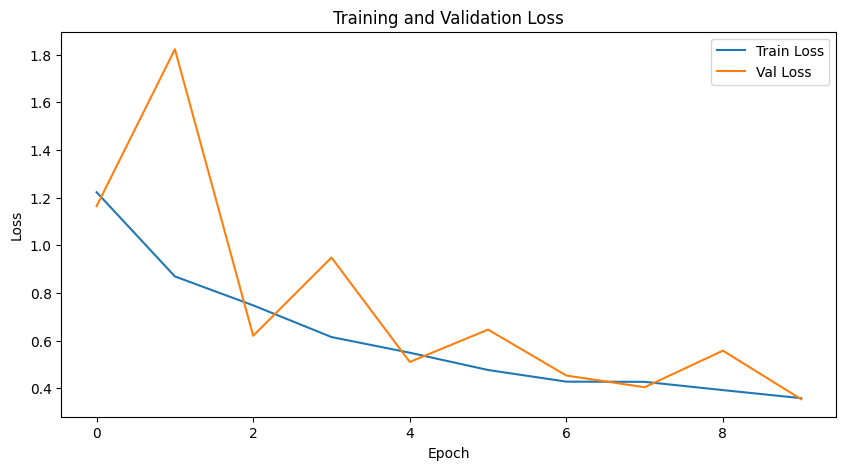

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

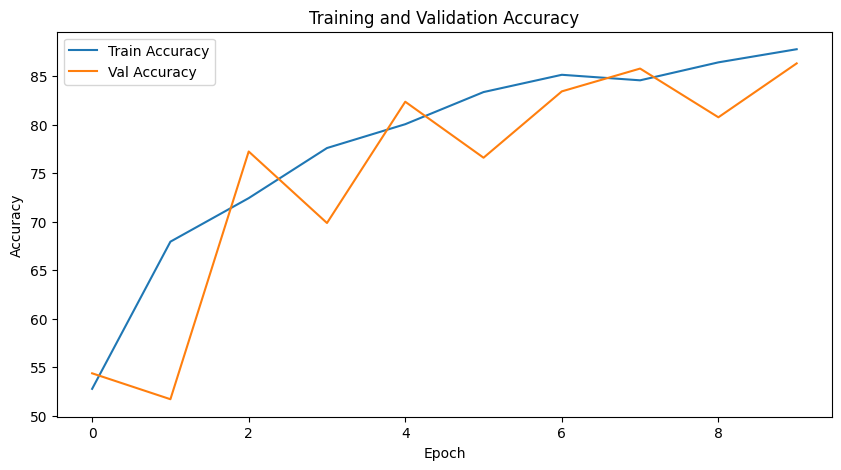

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## Visualize images in the test set

Let's first visualize a batch of images in the test set.

In [103]:
test_dl = DataLoader(test_set, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

In [104]:
for images, labels in test_dl:
  visualize_batch(images, labels)
  break

Output hidden; open in https://colab.research.google.com to view.

## Plot predictions

**Transformed Images in Dataloader**: When I create `train_dl`, each time I pull an image, it applies transformations such as resizing, normalization, and others. So, in practice, when I train the model, it uses these transformed versions of the images.

**Plotting Predictions**: In my `plot_predictions` function, if I directly access the dataset without retrieving the transformed images (which were only transformed during training or evaluation), I end up getting the raw images instead, when visualizing, if you are accessing images directly from the dataset (as in `data_loader.dataset[idx]`), you are getting the original images without the transformations.

In [107]:
import random
import matplotlib.pyplot as plt
import torch

plt.rcParams['axes.titlesize'] = 12

def plot_predictions(model, data_loader, classes):
    model.eval()

    total_images = len(data_loader.dataset)

    # Randomly select 16 indices from the dataset
    random_indices = random.sample(range(total_images), min(16, total_images))

    selected_images = []
    selected_labels = []

    # Collect images and labels based on the selected indices
    for idx in random_indices:
        img, label = data_loader.dataset[idx]
        selected_images.append(img)
        selected_labels.append(label)

    # Convert the list of images to a tensor for batch processing
    selected_images = torch.stack(selected_images).to(next(model.parameters()).device)  # Ensure images are on the same device as the model
    selected_labels = torch.tensor(selected_labels).to(next(model.parameters()).device)  # Move labels to the same device as the model

    # Get the model outputs
    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = model(selected_images)

    _, predicted = torch.max(outputs.data, 1)

    # Create a plot for the selected images
    plt.figure(figsize=(25, 25))
    num_images = selected_images.size(0)
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        img = selected_images[i].cpu().permute(1, 2, 0).numpy()  # Move image back to CPU for plotting

        # Rescale the image if it's normalized
        img = (img - img.min()) / (img.max() - img.min()) if img.max() != img.min() else img  # Avoid division by zero

        plt.imshow(img)
        plt.title(f'True: {classes[selected_labels[i]]}, Predicted: {classes[predicted[i]]}')
        plt.axis('off')

    plt.show()

### plot predictions of train set

In [108]:
plot_predictions(model, train_dl, classes)

Output hidden; open in https://colab.research.google.com to view.

### plot predictions of test set

In [109]:
plot_predictions(model, test_dl, classes)

Output hidden; open in https://colab.research.google.com to view.

## Evaluate test set

In [111]:
def check_accuracy(model, data_loader, criterion, device):
  model.eval()

  test_loss = 0.0
  correct = 0
  total = 0

  with torch.no_grad():
    for images, labels in data_loader:
      images, labels = images.to(device), labels.to(device)

      # Forward pass
      outputs = model(images)

      # Calculate loss
      loss = criterion(outputs, labels)
      test_loss += loss.item()

      # Calculate accuracy
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  average_test_loss = test_loss / len(data_loader)
  test_accuracy = (100 * correct) / total

  return average_test_loss, test_accuracy

In [112]:
avg_test_loss, test_accuracy = check_accuracy(model, test_dl, criterion, device)

In [113]:
avg_test_loss, test_accuracy

(0.5588560882218493, 84.61538461538461)

## Saving the model

In [115]:
os.mkdir("models")

In [117]:
model_path = "/content/models/resnet-18-model.pth"

In [118]:
torch.save(model.state_dict(), model_path)